In [122]:
#Getting Started

In [123]:
#Exploring the Data


In [124]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
#from time import time
from IPython.display import display # Allows the use of display() for DataFrames


# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("dataset.csv")

# Success - Display the first record
display(data.head(n=3))



,Date,Open,High,Low,Close,Volume
0,1789-05-01,0.51,0.51,0.51,0.51,NaN
1,1789-06-01,0.51,0.51,0.51,0.51,NaN
2,1789-07-01,0.50,0.50,0.50,0.50,NaN


In [125]:
display(data.tail(n=5))

,Date,Open,High,Low,Close,Volume
37585,2017-12-18,2685.92,2694.97,2685.92,2690.16,608455168.0
37586,2017-12-19,2692.71,2694.44,2680.74,2681.47,556473472.0
37587,2017-12-20,2688.18,2691.01,2676.11,2679.25,521377568.0
37588,2017-12-21,2683.02,2692.64,2682.40,2684.57,511474976.0
37589,2017-12-22,2684.22,2685.35,2678.13,2683.34,NaN


In [126]:
#  Total number of records
n_records = len(data.index)
print "Total number of records : {}".format(n_records)

Total number of records : 37590


In [127]:
#Featureset Exploration 

    #Date – Date of the day
    #Open – Opening market price of the day
    #High – Highest market price of the day
    #Low – Lowest market price of the day
    #Close – Closing market price of the day
    #Volume – Number of transaction on the given day


In [128]:
#Indexed_data
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('dataset.csv', index_col='Date',date_parser=dateparse)
print data.head()

                     Open  High   Low  Close  Volume
Date                                                
1789-05-01 00:00:00  0.51  0.51  0.51   0.51     NaN
1789-06-01 00:00:00  0.51  0.51  0.51   0.51     NaN
1789-07-01 00:00:00  0.50  0.50  0.50   0.50     NaN
1789-08-01 00:00:00  0.50  0.51  0.50   0.51     NaN
1789-09-01 00:00:00  0.51  0.51  0.50   0.51     NaN


In [129]:
data.index

DatetimeIndex(['1789-05-01', '1789-06-01', '1789-07-01', '1789-08-01',
               '1789-09-01', '1789-10-01', '1789-11-01', '1789-12-01',
               '1790-01-01', '1790-02-01',
               ...
               '2017-12-11', '2017-12-12', '2017-12-13', '2017-12-14',
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22'],
              dtype='datetime64[ns]', name=u'Date', length=37590, freq=None)

In [130]:
Actual_data = data['1980-01-01':'2017-11-01']

In [131]:
Actual_data['High'].count()

9544

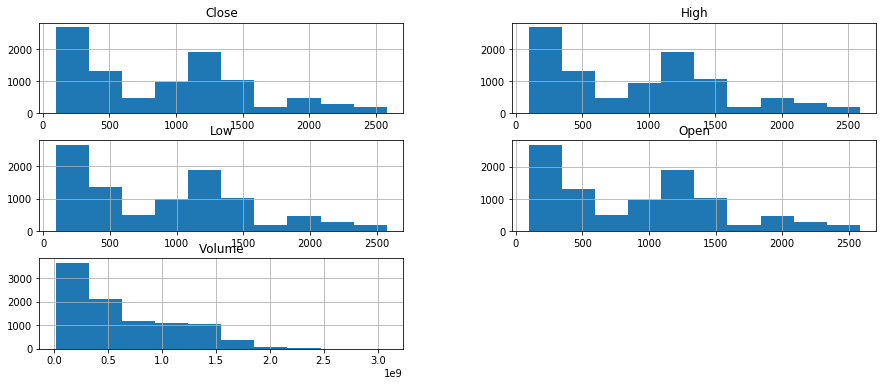

In [132]:
# checking all features value in histogram
import matplotlib.pylab as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
#from matplotlib import pyplot
Actual_data.hist()
plt.show()

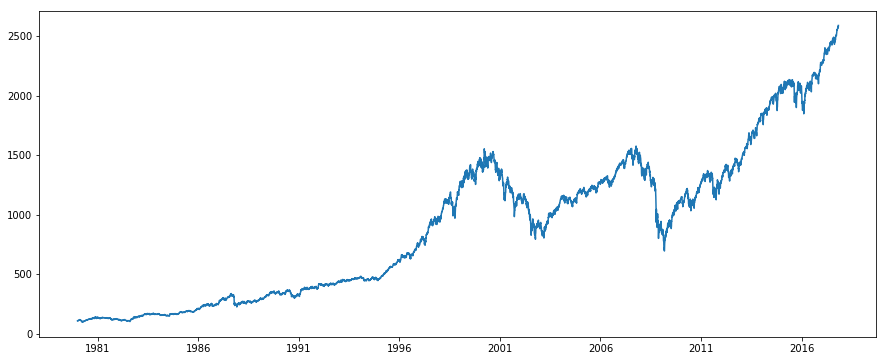

In [133]:
plt.plot(Actual_data['High'])

In [134]:
#Data Pre-processing, using Scaler function to scale down values of features between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [135]:
numerical = ['Open', 'High', 'Low', 'Close', 'Volume']
features_log_minmax_transform = pd.DataFrame(data = Actual_data)
features_log_minmax_transform[numerical] = scaler.fit_transform(Actual_data[numerical])

In [136]:
# Show an example of a record with scaling applied
display(features_log_minmax_transform.tail(n = 5))

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-26,0.990692,0.991430,0.993905,0.991675,0.178371
2017-10-27,0.994789,0.997822,0.996380,1.000000,0.205051
2017-10-30,0.997803,0.996637,0.997311,0.996681,0.180219
2017-10-31,0.997095,0.995938,0.998883,0.997660,0.198417
2017-11-01,1.000000,1.000000,1.000000,0.999311,0.172321


In [137]:
final = ['Open', 'Low', 'Close', 'Volume']
final_data = features_log_minmax_transform[final]
final_target = features_log_minmax_transform['High']

In [138]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_data, 
                                                    final_target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 7635 samples.
Testing set has 1909 samples.


In [139]:
#split Training data again in Training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                    y_train, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Validation set has {} samples.".format(X_val.shape[0])

Training set has 6108 samples.
Validation set has 1527 samples.


In [140]:
X_train.count()

Open      6108
Low       6108
Close     6108
Volume    6108
dtype: int64

In [141]:
#Implementation of linear regression
from sklearn.linear_model import LinearRegression
my_linear_model = LinearRegression()
my_linear_train = my_linear_model.fit(X_train,y_train)

In [142]:
val_score_linear = my_linear_model.score(X_val,y_val)
print "Linear regression Validation Score {}.".format(val_score_linear)

Linear regression Validation Score 0.999967036483.


In [143]:
my_linear_score = my_linear_model.score(X_test,y_test)
print "Linear regression Test Score {}.".format(my_linear_score)

Linear regression Test Score 0.99996403167.


In [144]:
my_linear_predict = my_linear_model.predict(X_test)

In [145]:
test_end_index = int(Actual_data['Open'].count())
test_start_index = int(X_train['Open'].count() + X_val['Open'].count())
print "Test start index {}".format(test_start_index)
print "Test end index {}".format(test_end_index)

Test start index 7635
Test end index 9544


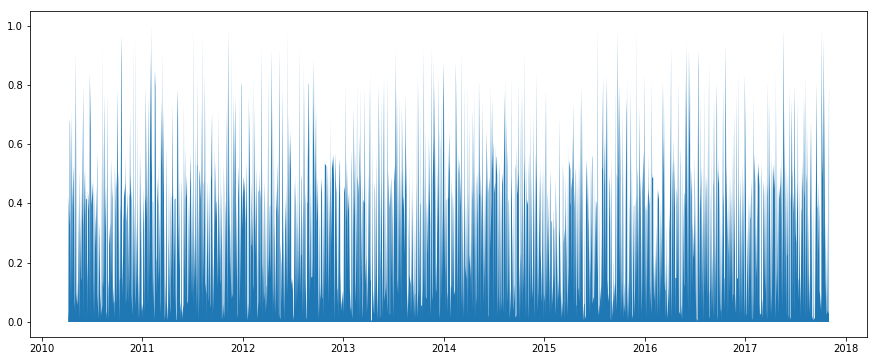

In [146]:

plt.fill_between(Actual_data.index[test_start_index:test_end_index],my_linear_predict)

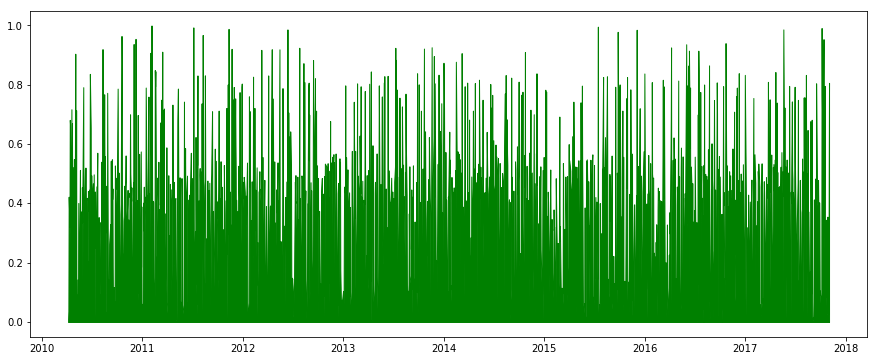

In [147]:
plt.fill_between(Actual_data.index[test_start_index:test_end_index],y_test,color = "g")

Text(0.5,1,u'Plot of Actual and Predicted Value of High over each other')

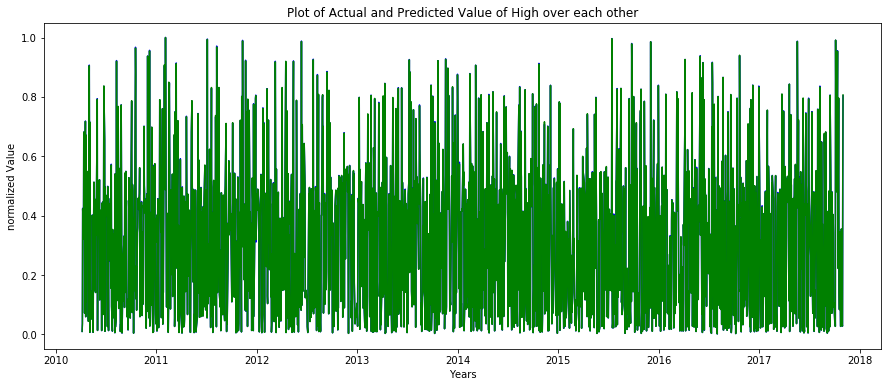

In [148]:
plt.plot(Actual_data.index[test_start_index:test_end_index],my_linear_predict,"b",Actual_data.index[test_start_index:test_end_index],y_test,"g")
plt.xlabel('Years')
plt.ylabel('normalized Value')
plt.title('Plot of Actual and Predicted Value of High over each other')

In [149]:
#Implementing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
my_GB_Regressor = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, random_state=None)

In [150]:
#training the Gradient Boost model
my_GB_train = my_GB_Regressor.fit(X_train,y_train)

In [151]:
val_score_Gradient = my_GB_Regressor.score(X_val,y_val)
print "Gradient Boosting regression Validation Score {}.".format(val_score_Gradient)

Gradient Boosting regression Validation Score 0.999881387892.


In [152]:
my_GB_Regressor_score = my_GB_Regressor.score(X_test,y_test)
print "Gradient Boosting regression Test Score {}.".format(my_GB_Regressor_score)

Gradient Boosting regression Test Score 0.99987014341.


In [153]:
my_GB_Regressor_predict = my_GB_Regressor.predict(X_test)

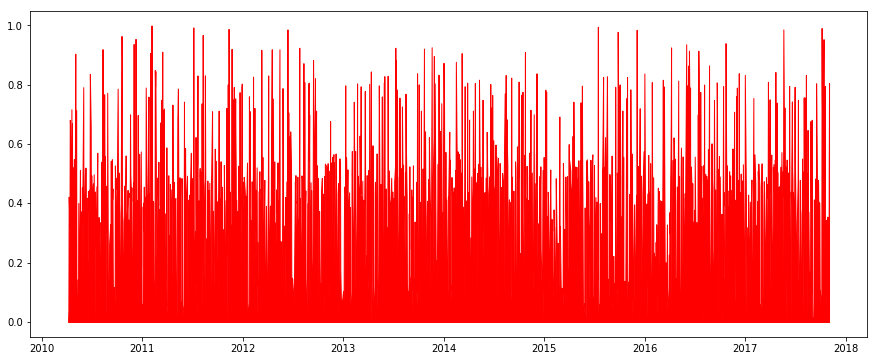

In [154]:
#Plot actual target with Dates
plt.fill_between(Actual_data.index[test_start_index:test_end_index],y_test,color = "r")

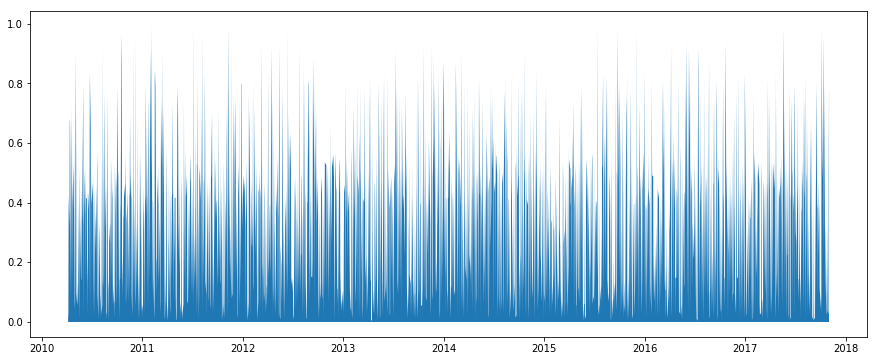

In [155]:
#plot the predicted data
plt.fill_between(Actual_data.index[test_start_index:test_end_index],my_GB_Regressor_predict)

Text(0.5,1,u'Plot of Actual and Predicted Value of High over each other')

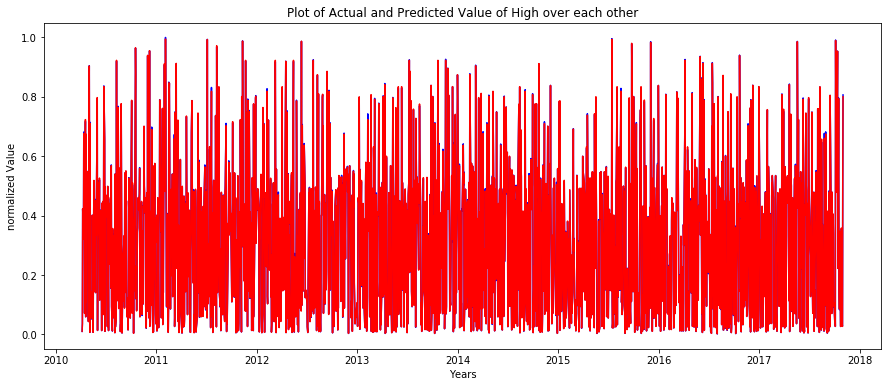

In [156]:
#plot overlap of both values
plt.plot(Actual_data.index[test_start_index:test_end_index],y_test,"b",Actual_data.index[test_start_index:test_end_index],my_GB_Regressor_predict,"r")
plt.xlabel('Years')
plt.ylabel('normalized Value')
plt.title('Plot of Actual and Predicted Value of High over each other')

In [157]:
#Implementing KNN Regressor
from sklearn import neighbors
my_KNN_regressor = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = 'distance')

In [158]:
my_KNN_regressor_train = my_KNN_regressor.fit(X_train,y_train)

In [159]:
val_score_KNN_regressor = my_KNN_regressor.score(X_val,y_val)
print "KNN regression Validation Score {}.".format(val_score_KNN_regressor)

KNN regression Validation Score 0.999886126398.


In [160]:
my_KNN_regressor_score = my_KNN_regressor.score(X_test,y_test)
print "KNN regression Test Score {}.".format(my_KNN_regressor_score)

KNN regression Test Score 0.999865749595.


In [161]:
my_KNN_regressor_predict = my_KNN_regressor.predict(X_test)

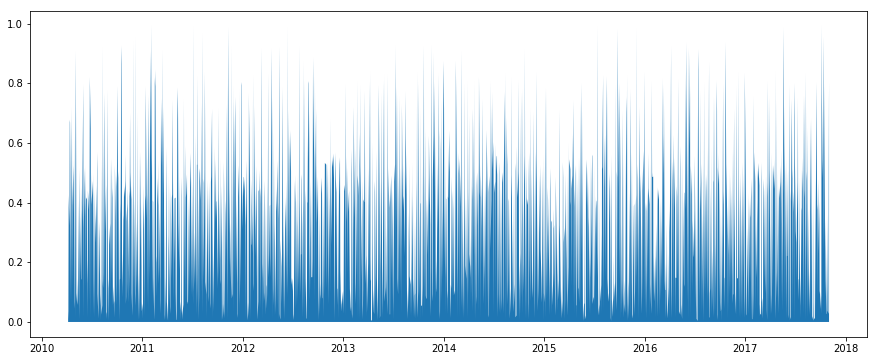

In [162]:
#Plot KNN regressor model prediction with Dates
plt.fill_between(Actual_data.index[test_start_index:test_end_index],my_KNN_regressor_predict)

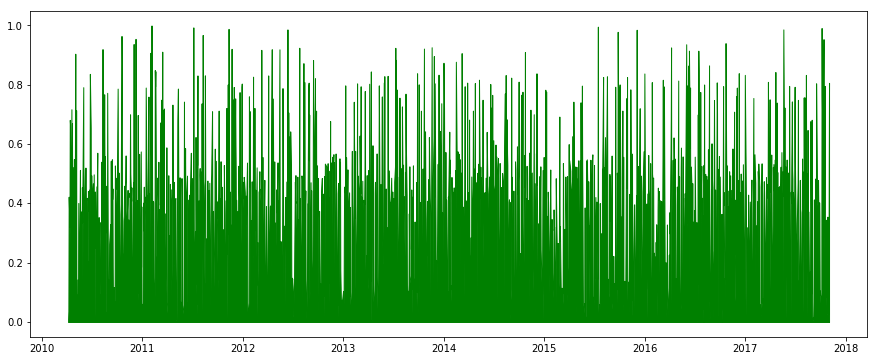

In [163]:
#Plot actual target with Dates
plt.fill_between(Actual_data.index[test_start_index:test_end_index],y_test,color = "g")

Text(0.5,1,u'Plot of Actual and Predicted Value of High over each other')

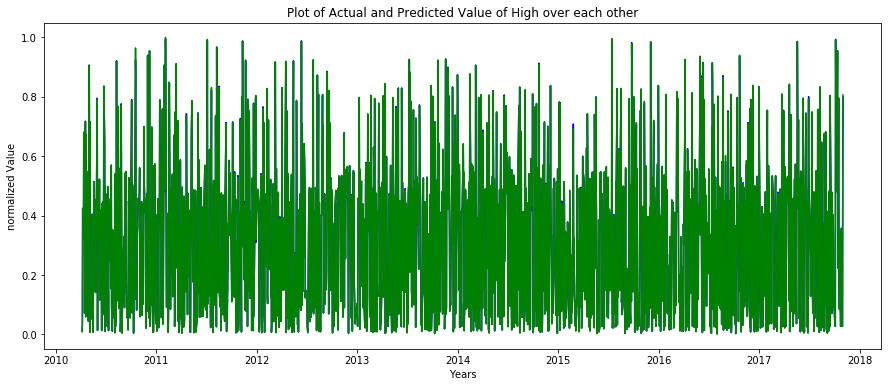

In [164]:
#plot overlap of both values
plt.plot(Actual_data.index[test_start_index:test_end_index],my_KNN_regressor_predict,"b",Actual_data.index[test_start_index:test_end_index],y_test,"g")
plt.xlabel('Years')
plt.ylabel('normalized Value')
plt.title('Plot of Actual and Predicted Value of High over each other')